In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/tumor.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/brain_tumor_dataset/"
test_dir = "/content/test/"

train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42,
    shuffle = True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    class_mode = "binary",
    target_size = (224, 224),
    seed = 42
)

model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(25, 4, activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(25, 4, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(25, 4, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(25, 4, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


model3.compile(
    optimizer = tf.keras.optimizers.Adam(0.0016),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ["accuracy"]
)

history3 = model3.fit(train_data, epochs = 15, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 13s 254ms/step - loss: 0.5966 - accuracy: 0.6601 - val_loss: 0.5575 - val_accuracy: 0.7708
Epoch 2/15
8/8 [==============================] - 2s 316ms/step - loss: 0.5749 - accuracy: 0.7312 - val_loss: 0.5277 - val_accuracy: 0.7787
Epoch 3/15
8/8 [==============================] - 1s 186ms/step - loss: 0.5623 - accuracy: 0.7826 - val_loss: 0.5081 - val_accuracy: 0.8024
Epoch 4/15
8/8 [==============================] - 1s 174ms/step - loss: 0.4740 - accuracy: 0.7826 - val_loss: 0.4490 - val_accuracy: 0.8142
Epoch 5/15
8/8 [==============================] - 1s 168ms/step - loss: 0.4515 - accuracy: 0.7905 - val_loss: 0.4298 - val_accuracy: 0.8024
Epoch 6/15
8/8 [==============================] - 1s 163ms/step - loss: 0.4140 - accuracy: 0.8300 - val_loss: 0.3909 - val_accuracy: 0.8024
Epoch 7/15
8/8 [==============================] - 1s 166ms/step - loss: 0.422

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

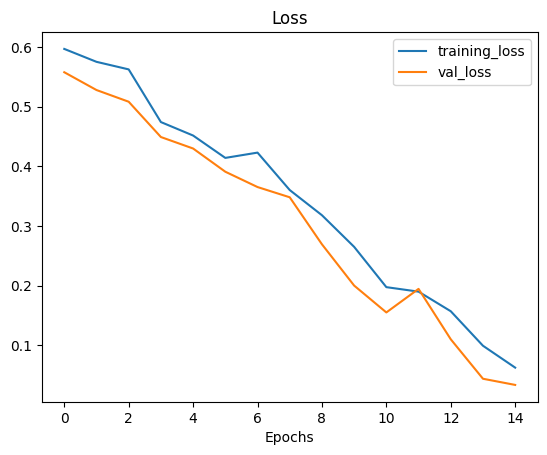

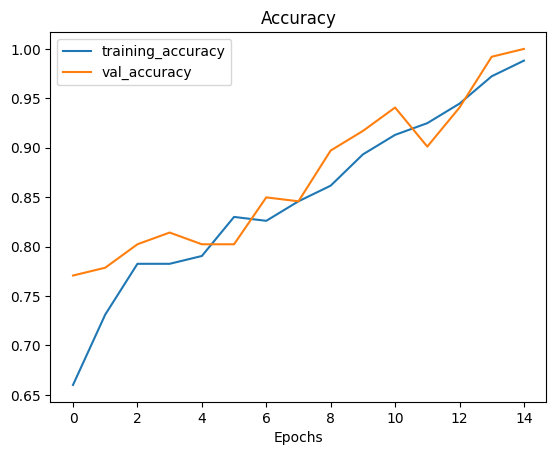

In [ ]:
plot_loss_curves(history3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/brain_tumor_dataset/"
test_dir = "/content/test/"

train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42,
    shuffle = True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    class_mode = "binary",
    target_size = (224, 224),
    seed = 42
)

history3 = model3.fit(train_data, epochs = 15, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 1s 182ms/step - loss: 0.0502 - accuracy: 0.9881 - val_loss: 0.0294 - val_accuracy: 0.9960
Epoch 2/15
8/8 [==============================] - 1s 175ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0100 - val_accuracy: 0.9960
Epoch 3/15
8/8 [==============================] - 1s 171ms/step - loss: 0.0098 - accuracy: 0.9960 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/15
8/8 [==============================] - 1s 168ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/15
8/8 [==============================] - 2s 260ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/15
8/8 [==============================] - 2s 227ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 8.2303e-04 - val_accuracy: 1.0000
Epoch 7/15
8/8 [==============================] - 1s 175ms/step - loss: 7.

In [ ]:
model3.save("model3.keras")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model3)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

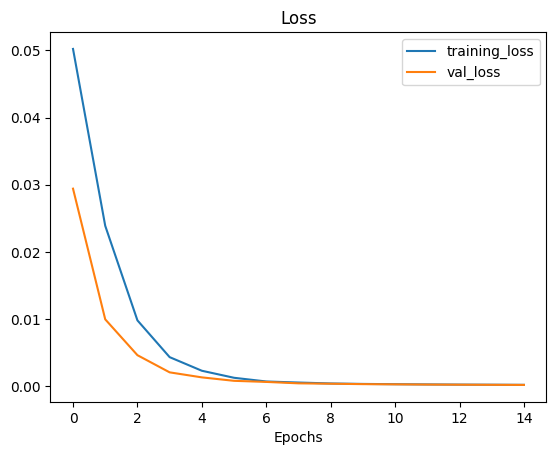

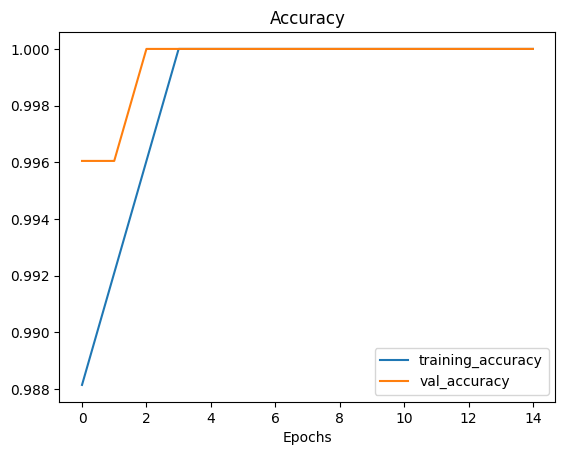

In [ ]:
plot_loss_curves(history3)

1/1 [==============================] - 0s 232ms/step


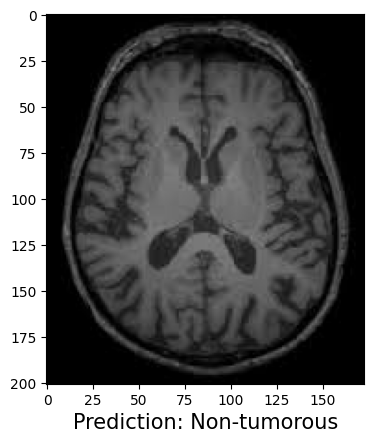

In [ ]:
def tumor_or_no(filepath):
  image = tf.io.read_file(filepath)
  image = tf.image.decode_image(image, channels = 3)
  resized_image = tf.image.resize(image, [224, 224])
  preds = model3.predict(tf.expand_dims(resized_image, axis = 0))
  plt.imshow(image)
  if preds == 1:
    plt.xlabel(f'Prediction: Tumorous', fontsize = 15)
  else:
    plt.xlabel(f'Prediction: Non-tumorous', fontsize = 15)
  return preds

n = tumor_or_no("/content/no/10 no.jpg")